In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
df=pd.read_csv(r"E:\csv\Titanic_train.csv")

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
print("NaN values in dataset",df.isna().sum().sum())

NaN values in dataset 866


C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

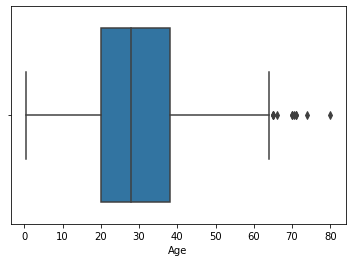

In [59]:
sns.boxplot(df.Age)

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

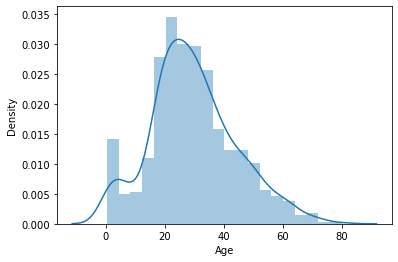

In [60]:
sns.distplot(df.Age)

In [61]:
df['Age'].fillna(round(df['Age'].mean()),inplace=True)

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

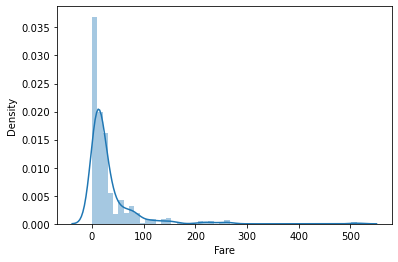

In [62]:
sns.distplot(df.Fare,kde=True)

In [63]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [64]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [65]:
df['Embarked'].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [66]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [67]:
x=df.drop(['Name','Ticket','Survived','Cabin'],axis=1)

In [68]:
y=df['Survived']

In [69]:
sc=StandardScaler()

In [70]:
x_scaler=sc.fit_transform(x)

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.1,random_state=42)

In [72]:
df=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [73]:
model=df.fit(x_train,y_train)

In [74]:
pred=model.predict(x_test)

In [75]:
print("Accuraca_score of training data",model.score(x_train,y_train))

Accuraca_score of training data 1.0


In [76]:
print("Accuracy score of testin data",accuracy_score(y_test,pred))

Accuracy score of testin data 0.7
